# Heart disease incidator

## Importing libaries and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('heart_data.csv')

In [ ]:
df.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


13 Columns in dataset:

1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.shape

(297, 14)

In [ ]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

**Question:** *Determine and examine factors that play a significant role in
increasing the rate of heart attacks*

##EDA

Numeric value


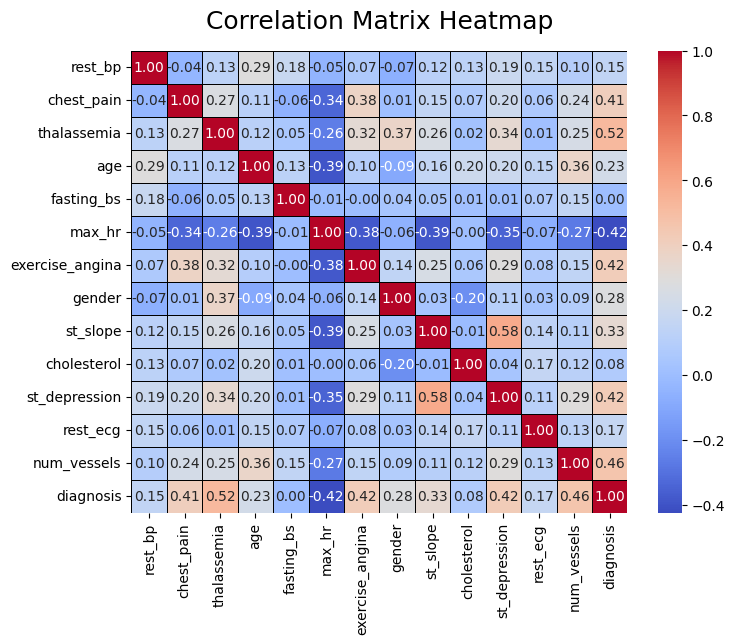

In [ ]:
test = df[['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis']]

correlation_matrix = test.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

# Customize the plot
heatmap.set_title('Correlation Matrix Heatmap', fontdict={'fontsize': 18}, pad=16)

# Display the plot
plt.show()

Correlation with Diagnosis (target value):

1)Thalassemia

2)num_vessels

3)exercise_angina and st_depression

4)chest_pain

5)st_slope


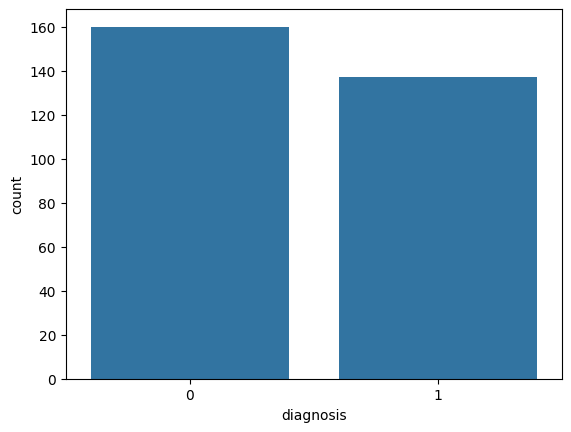

In [ ]:
condition_ax = sns.countplot(x='diagnosis', data=df)

plt.show()


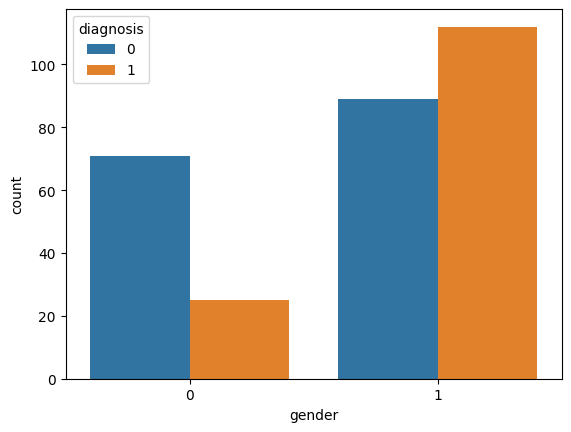

In [ ]:
sex_ax = sns.countplot(x='gender', hue='diagnosis', data=df)
plt.show()

Males are at more risk of heart disease

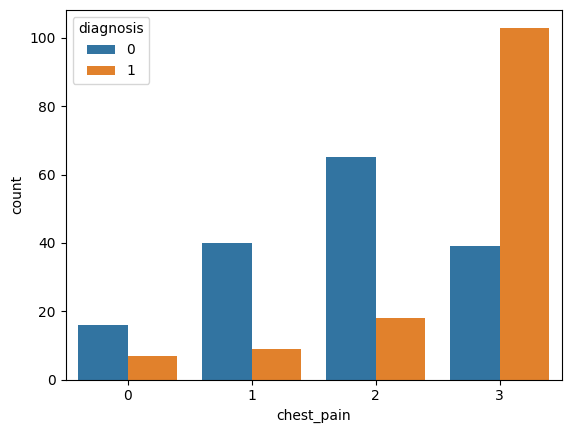

In [ ]:
cp_ax = sns.countplot(x='chest_pain', hue='diagnosis', data=df)

plt.show()

People with chest pain at 3 are at more risk of heart disease

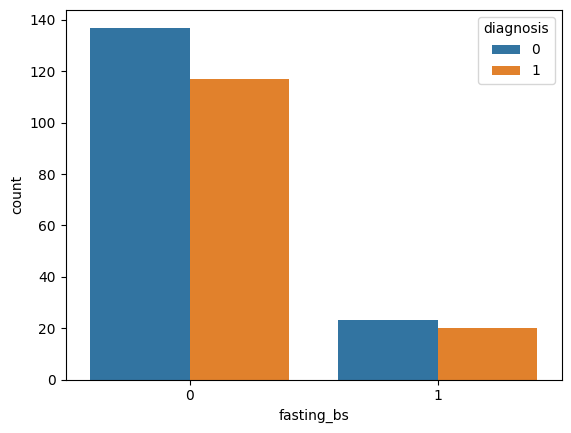

In [ ]:
fbs_ax = sns.countplot(x='fasting_bs', hue='diagnosis', data=df)
plt.show()

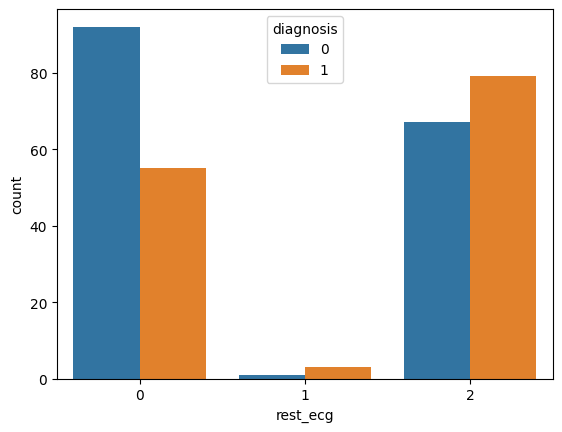

In [ ]:
restecg_ax = sns.countplot(x='rest_ecg', hue='diagnosis', data=df)

plt.show()

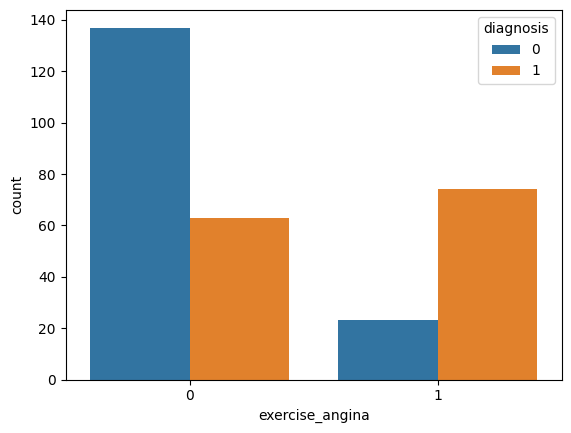

In [ ]:
exang_ax = sns.countplot(x='exercise_angina', hue='diagnosis', data=df)
plt.show()

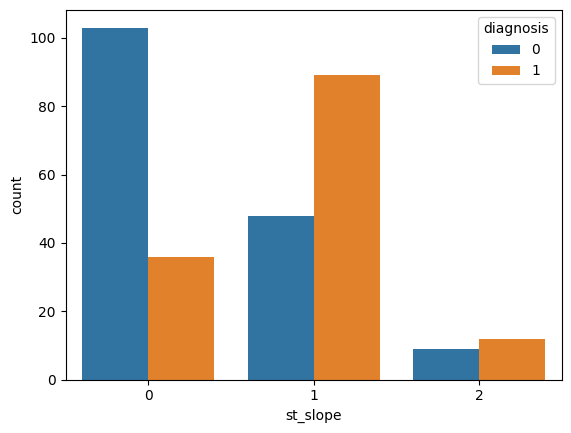

In [ ]:
slope_ax = sns.countplot(x='st_slope', hue='diagnosis', data=df)
plt.show()

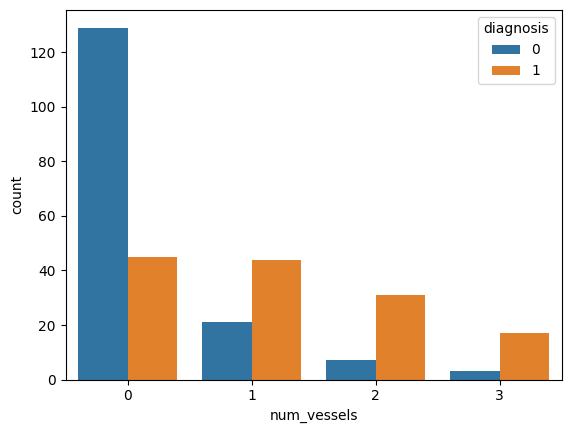

In [ ]:
ca_ax = sns.countplot(x='num_vessels', hue='diagnosis', data=df)

plt.show()

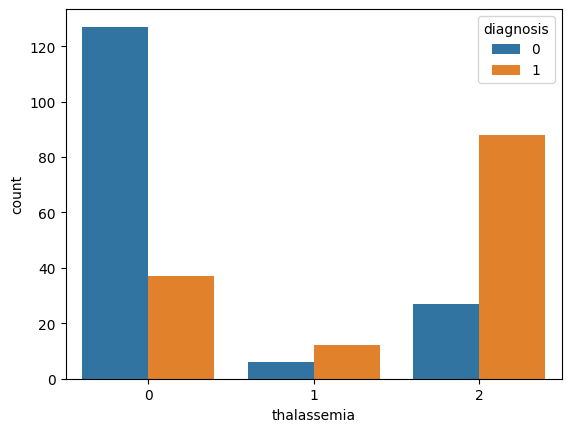

In [ ]:
thal_ax = sns.countplot(x='thalassemia', hue='diagnosis', data=df)

plt.show()


## Analysis


## Model preparation

## Importing libraries for SVM and ANN and Logistic regression

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Splitting the dataset

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,130,2,2,62,0,97,0,0,1,263,1.2,0,1
293,100,3,0,58,0,122,0,0,1,248,1.0,2,0
294,138,3,0,59,0,182,0,1,0,271,0.0,2,0
295,130,3,2,56,1,103,1,1,2,283,1.6,2,0


In [ ]:
y

0      0
1      0
2      1
3      1
4      1
      ..
292    1
293    0
294    0
295    1
296    1
Name: diagnosis, Length: 297, dtype: int64

### Splitting the dataset into Training and Test

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=4)

In [ ]:
print(X.shape , X_train.shape ,X_test.shape)

(297, 13) (237, 13) (60, 13)


### Training the dataset

In [ ]:
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
#lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)
#lr_mean_score = round(lr_cv_results.mean(), 4)

#print("Mean score from cross-validation:", lr_mean_score)

LogisticRegression()

In [ ]:
# training svm model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
# trainging ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=4)
ann_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=4)

### Accuracy score

In [ ]:
lr_model.score(X_test,Y_test)

0.85

Accuracy of the model is 85%

In [ ]:
#training data accuracy
X_train_prediction=lr_model.predict(X_train)
training_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy in training data:' , training_accuracy)

Accuracy in training data: 0.8354430379746836


In [ ]:
#testing data accuracy
X_test_prediction=lr_model.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy in test data:', test_accuracy)

Accuracy in test data: 0.85


**Logistic Regression:**

*Training Accuracy:* 83.54%

*Test Accuracy:* 85.00%

In [ ]:
svm_training_accuracy = accuracy_score(Y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(Y_test, svm_model.predict(X_test))

print('SVM Accuracy in training data:', svm_training_accuracy)
print('SVM Accuracy in test data:', svm_test_accuracy)

SVM Accuracy in training data: 0.8945147679324894
SVM Accuracy in test data: 0.7666666666666667


**SVM (Support Vector Machine):**

*Training Accuracy*: 89.45%

*Test Accuracy: *76.67%

In [ ]:
ann_training_accuracy = accuracy_score(Y_train, ann_model.predict(X_train))
ann_test_accuracy = accuracy_score(Y_test, ann_model.predict(X_test))

print('ANN Accuracy in training data:', ann_training_accuracy)
print('ANN Accuracy in test data:', ann_test_accuracy)

ANN Accuracy in training data: 0.9367088607594937
ANN Accuracy in test data: 0.7666666666666667


**ANN (Artificial Neural Network):**

*Training Accuracy: *93.67%

*Test Accuracy: * 76.67%

Based on the provided accuracy metrics, **Logistic Regression** appears to be the most balanced choice for this dataset

## Evaluation


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Define a function to evaluate models
def evaluate_model(name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    print(f"Model: {name}")

    # Training metrics
    print("Training metrics:")
    print(f"Accuracy: {accuracy_score(y_true_train, y_pred_train)}")
    print(f"Precision: {precision_score(y_true_train, y_pred_train)}")
    print(f"Recall: {recall_score(y_true_train, y_pred_train)}")
    print(f"F1 Score: {f1_score(y_true_train, y_pred_train)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true_train, y_pred_train)}")
    print(f"Classification Report:\n{classification_report(y_true_train, y_pred_train)}")

    # Testing metrics
    print("Testing metrics:")
    print(f"Accuracy: {accuracy_score(y_true_test, y_pred_test)}")
    print(f"Precision: {precision_score(y_true_test, y_pred_test)}")
    print(f"Recall: {recall_score(y_true_test, y_pred_test)}")
    print(f"F1 Score: {f1_score(y_true_test, y_pred_test)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true_test, y_pred_test)}")
    print(f"Classification Report:\n{classification_report(y_true_test, y_pred_test)}")



In [ ]:
# Evaluate Logistic Regression
evaluate_model("Logistic Regression", Y_train,lr_model.predict(X_train), Y_test, lr_model.predict(X_test))

Model: Logistic Regression
Training metrics:
Accuracy: 0.8354430379746836
Precision: 0.8476190476190476
Recall: 0.7946428571428571
F1 Score: 0.8202764976958524
Confusion Matrix:
[[109  16]
 [ 23  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       125
           1       0.85      0.79      0.82       112

    accuracy                           0.84       237
   macro avg       0.84      0.83      0.83       237
weighted avg       0.84      0.84      0.84       237

Testing metrics:
Accuracy: 0.85
Precision: 0.8636363636363636
Recall: 0.76
F1 Score: 0.8085106382978724
Confusion Matrix:
[[32  3]
 [ 6 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.86      0.76      0.81        25

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg 

The **Logistic Regression model** shows good performance with an **accuracy of 85%** on the test set.

It has balanced precision and recall scores, indicating that it correctly identifies both positive and negative cases of heart disease reasonably well.

*The F1 score, which combines precision and recall, is also solid at 80.85%.*

In [ ]:
# Evaluate SVM
evaluate_model("SVM", Y_train, svm_model.predict(X_train), Y_test, svm_model.predict(X_test))

Model: SVM
Training metrics:
Accuracy: 0.8945147679324894
Precision: 0.9142857142857143
Recall: 0.8571428571428571
F1 Score: 0.8847926267281105
Confusion Matrix:
[[116   9]
 [ 16  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       125
           1       0.91      0.86      0.88       112

    accuracy                           0.89       237
   macro avg       0.90      0.89      0.89       237
weighted avg       0.90      0.89      0.89       237

Testing metrics:
Accuracy: 0.7666666666666667
Precision: 0.72
Recall: 0.72
F1 Score: 0.72
Confusion Matrix:
[[28  7]
 [ 7 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.72      0.72      0.72        25

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77

The **SVM model** shows **higher training accuracy (89.45%)** but **lower test accuracy (76.67%)**, suggesting it might be overfitting the training data.

The precision and recall scores are balanced in the test set, but the F1 score is lower compared to Logistic Regression.

In [ ]:
# Evaluate ANN
evaluate_model("ANN", Y_train, ann_model.predict(X_train), Y_test, ann_model.predict(X_test))

Model: ANN
Training metrics:
Accuracy: 0.9367088607594937
Precision: 0.944954128440367
Recall: 0.9196428571428571
F1 Score: 0.9321266968325792
Confusion Matrix:
[[119   6]
 [  9 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.94      0.92      0.93       112

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237

Testing metrics:
Accuracy: 0.7666666666666667
Precision: 0.7391304347826086
Recall: 0.68
F1 Score: 0.7083333333333334
Confusion Matrix:
[[29  6]
 [ 8 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg    

The **ANN model** demonstrates **high training accuracy (93.67%)** and reasonable **test accuracy (76.67%)**.

However, the test precision, recall, and F1 score are slightly lower compared to Logistic Regression, indicating it might not generalize as well to unseen data as Logistic Regression does in this case.

## Predictive system

In [ ]:
input=(130,2,0,53,1,152,0,1,2,197,1.2,2,0)

input_as_numpy_array=np.asarray(input)

#reshaping
input_reshaped=input_as_numpy_array.reshape(1,-1)
prediction=lr_model.predict(input_reshaped)
print(prediction)

if(prediction[0]== 0):
    print('the person does not have heart disease')
else:
    print('the person have heart disease')


[0]
the person does not have heart disease
